# Escenarios experimentales Internetworking CNN ESCENARIO C
Presentado por: Jonathan Toapanta
Fecha: 23/02/2023

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Gives us Graphics
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten

In [ ]:
# Load data
url = 'https://raw.githubusercontent.com/beespinosa1/Inter/main/Escenario3.csv'
df = pd.read_csv(url)

In [ ]:
# Rename columns
names =['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur',
        'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service',
        'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb',
        'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
        'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt',
        'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
        'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
        'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
        'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']
df = pd.read_csv(url, names=names, low_memory=False)

In [ ]:
# Shuffle data
dataframe = df.reindex(np.random.permutation(df.index)).copy()

In [ ]:
# Normalize data
def dfNormalize(df):
    for feature_name in df.columns:
        df[feature_name] = pd.to_numeric(df[feature_name], errors='coerce')
        feature_values = df[feature_name].dropna()
        if len(feature_values) == 0:
            continue
        max_value = feature_values.max()
        min_value = feature_values.min()   
        if (max_value - min_value) > 0:
            df[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        else:
            df[feature_name] = 0.0    
    return df



In [ ]:
keys = dataframe.keys()
data_to_process = dataframe[keys[4:len(keys)-1]].copy()
x_normalized = dfNormalize(data_to_process)

In [ ]:
# get the train and test data
y = dataframe['Label']

In [ ]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.3)


In [ ]:
# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))



In [ ]:
from keras.callbacks import EarlyStopping
from sklearn.metrics import precision_recall_fscore_support
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model with early stopping
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, callbacks=[early_stop])


Epoch 1/20
39/39 [==============================] - 10s 191ms/step - loss: nan - accuracy: 0.9641 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.9676 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
39/39 [==============================] - 5s 138ms/step - loss: nan - accuracy: 0.9641 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.9676 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
39/39 [==============================] - 8s 200ms/step - loss: nan - accuracy: 0.9641 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.9676 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
39/39 [==============================] - 4s 100ms/step - loss: nan - accuracy: 0.9641 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.9676 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
39/39 [==============================] - 3s 81ms/ste

In [ ]:
# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Obtener las predicciones
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

# Reemplazar NaN con 0
y_pred = np.nan_to_num(y_pred)

# Calcular precision, recall, f1-score y accuracy
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
accuracy = model.evaluate(x_test, y_test)[1]

# Calculate precision, recall, f1-score, and accuracy
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label=1)
accuracy = score[1]

# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

19/33 [================>.............] - ETA: 0s - loss: nan - accuracy: 0.9671 - precision: 0.0000e+00 - recall: 0.0000e+00

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


33/33 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.9676 - precision: 0.0000e+00 - recall: 0.0000e+00
Accuracy: 0.9676190614700317
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer



In [ ]:
from sklearn.impute import SimpleImputer
# cargar datos
url = 'https://raw.githubusercontent.com/beespinosa1/Inter/main/Escenario3.csv'
df = pd.read_csv(url)



In [ ]:
# Rename columns
names =['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur',
        'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service',
        'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb',
        'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
        'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt',
        'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
        'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
        'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
        'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']
df = pd.read_csv(url, names=names, low_memory=False)


In [ ]:
# Shuffle data
dataframe = df.reindex(np.random.permutation(df.index)).copy()


In [ ]:
# Normalize data
def dfNormalize(df):
    for feature_name in df.columns:
        df[feature_name] = pd.to_numeric(df[feature_name], errors='coerce')
        feature_values = df[feature_name].dropna()
        if len(feature_values) == 0:
            continue
        max_value = feature_values.max()
        min_value = feature_values.min()   
        if (max_value - min_value) > 0:
            df[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        else:
            df[feature_name] = 0.0    
    return df


In [ ]:
# Eliminar filas con valores NaN
keys = dataframe.keys()
data_to_process = dataframe[keys[4:len(keys)-1]].copy()
x_normalized = dfNormalize(data_to_process)

# get the train and test data
y = dataframe['Label']

In [ ]:
# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.3, random_state=42)


In [ ]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42]
}

In [ ]:
# Train the Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='f1')

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200], 'random_state': [42]},
             scoring='f1')

In [ ]:
# Print the best parameters and the best score
print('Best parameters: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best parameters:  {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 42}
Best score:  1.0


In [ ]:
# Make predictions on the test set
y_pred = rfc.predict(x_test)

In [ ]:
# Calculate accuracy, precision, recall and f1-score
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1-score: ', f1_score(y_test, y_pred))

Accuracy:  0.9990476190476191
Precision:  0.9722222222222222
Recall:  1.0
F1-score:  0.9859154929577464


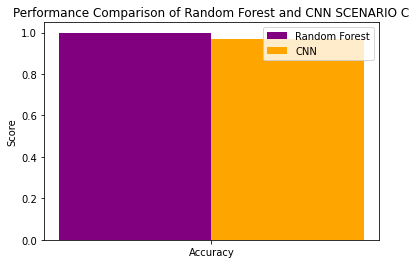

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and their scores
metrics = ['Accuracy']
rf_scores = [accuracy_score(y_test, y_pred)]
cnn_scores = [accuracy]

# Set the bar width
bar_width = 0.35

# Set the positions of the bars
bar_positions_rf = np.arange(len(metrics))
bar_positions_cnn = bar_positions_rf + bar_width

# Create the bar plots
plt.bar(bar_positions_rf, rf_scores, width=bar_width,color='purple', label='Random Forest')
plt.bar(bar_positions_cnn, cnn_scores, width=bar_width,color='orange' ,label='CNN')

# Add labels and title
plt.xticks(bar_positions_rf + bar_width / 2, metrics)
plt.ylabel('Score')
plt.title('Performance Comparison of Random Forest and CNN SCENARIO C')

# Add legend and show the plot
plt.legend()
plt.show()